In [1]:
import pyodbc 
import pandas as pd
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=cocomel;"
                      "Database=FAS_OAR_DEV;"
                      "Trusted_Connection=yes;")

In [2]:
df = pd.read_sql_query('select Id, FPDS_Description_of_Requirement, L2 from FAS_OAR_DEV_STAGE3_POC.dbo.GovWide_ITC_Master_data_POC', cnxn)
df

,Id,FPDS_Description_of_Requirement,L2
0,2458,None,Hardware
1,2459,None,Hardware
2,2460,None,Hardware
3,2461,None,Services
4,2462,None,Hardware
...,...,...,...
1776789,1776513,MODIFICATION TO EXERCISE OPTION 1 OF THE DEFEN...,Services
1776790,1776514,IGF::OT::IGF NXEV002372EBM,Services
1776791,1776515,IGF::OT::IGF NXEV000833EBM,Services
1776792,1776517,PKG-CCRP : FIBERPLEX,Hardware


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776794 entries, 0 to 1776793
Data columns (total 3 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Id                               int64 
 1   FPDS_Description_of_Requirement  object
 2   L2                               object
dtypes: int64(1), object(2)
memory usage: 40.7+ MB


In [4]:
df = df.dropna() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889140 entries, 845267 to 1776793
Data columns (total 3 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Id                               889140 non-null  int64 
 1   FPDS_Description_of_Requirement  889140 non-null  object
 2   L2                               889140 non-null  object
dtypes: int64(1), object(2)
memory usage: 27.1+ MB


In [5]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

!pip install wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
text = " ".join(FPDS_Description_of_Requirement for FPDS_Description_of_Requirement in df.FPDS_Description_of_Requirement)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 55468589 words in the combination of all review.


In [7]:
wordcloud = WordCloud().generate(text)

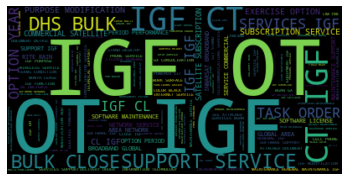

In [8]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

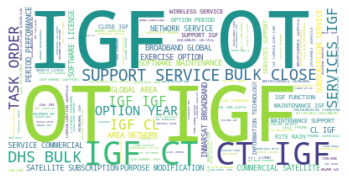

In [9]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Null", "N/A"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
from io import StringIO

In [11]:
col = ['L2', 'FPDS_Description_of_Requirement']
df = df[col]
df = df[pd.notnull(df['FPDS_Description_of_Requirement'])]
df = df[pd.notnull(df['L2'])]

In [12]:
df.columns = ['L2','FPDS_Description_of_Requirement']

In [13]:
df['category_id']=df['L2'].factorize()[0]
category_id_df = df[['L2','category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','L2']].values)
df.head()

,L2,FPDS_Description_of_Requirement,category_id
845267,Services,IGF::OT::IGF - OTHER FUNCTIONS,0
845270,Hardware,FAST FUNCTIONALITY DEVELOPMENT,1
845271,Services,THIRD AWARD TERM - LOT VIII,0
845272,Services,IGF::CT::IGF,0
845275,Services,BASE YEAR RENEWAL,0


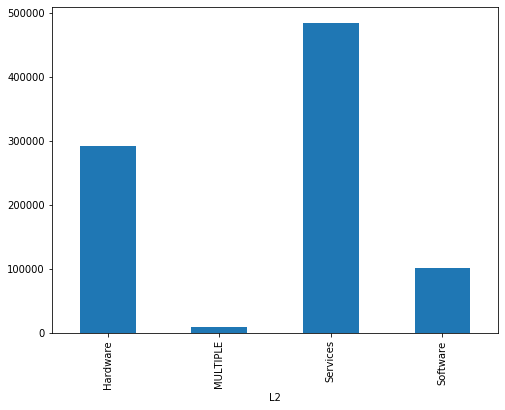

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('L2').FPDS_Description_of_Requirement.count().plot.bar(ylim=0)
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [17]:
features = tfidf.fit_transform(df.FPDS_Description_of_Requirement)##.toarray()
labels = df.category_id
features.shape

(889140, 178311)

In [18]:
from sklearn.feature_selection import chi2
import numpy as np

In [19]:
N = 2 
for L2, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(L2))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Hardware':
  . Most correlated unigrams:
. ot
. igf
  . Most correlated bigrams:
. ot igf
. igf ot
# 'MULTIPLE':
  . Most correlated unigrams:
. phone
. cell
  . Most correlated bigrams:
. phone service
. cell phone
# 'Services':
  . Most correlated unigrams:
. ot
. igf
  . Most correlated bigrams:
. ot igf
. igf ot
# 'Software':
  . Most correlated unigrams:
. license
. software
  . Most correlated bigrams:
. software license
. adp software


C:\Users\melco\Anaconda3\envs\MLPython\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\melco\Anaconda3\envs\MLPython\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

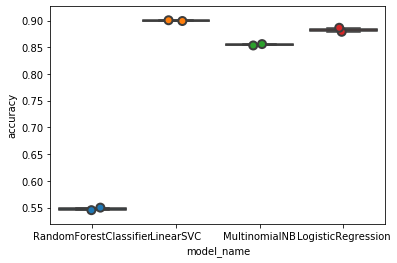

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),]
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [21]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.899872
LogisticRegression        0.882752
MultinomialNB             0.854710
RandomForestClassifier    0.547633
Name: accuracy, dtype: float64

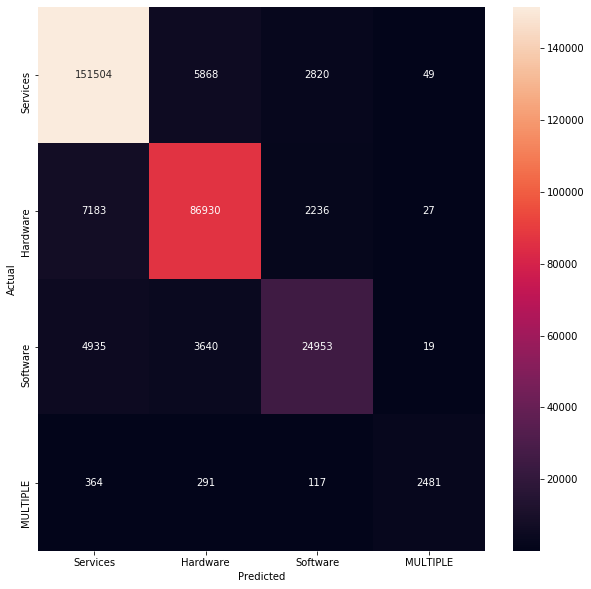

In [22]:
from sklearn.model_selection import train_test_split
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.L2.values, yticklabels=category_id_df.L2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
import pickle

In [24]:
model = LinearSVC()

In [25]:
L2LSVC_savedmodel = pickle.dumps(LinearSVC)

In [26]:
LinearSVC_from_pickle = pickle.loads(L2LSVC_savedmodel)

In [31]:
#predictions = LinearSVC_from_pickle.predict(X_test)
y_pred = LinearSVC_from_pickle.predict(X_test)

TypeError: predict() missing 1 required positional argument: 'X'